In [10]:
### YES/NO data dictionary

YES = 1
NO = 2
NOT_APPLY = 97
IGNORED = 98
NOT_SPECIFIED = 99


# Laboratory result dictionary
LAB_POSITIVE  = 1
LAB_NO_POSITIVE = 2
LAB_PENDING_RESULT = 3
LAB_WRONG_RESULT = 4
LAB_NOT_APPLY = 97 # CASO SIN MUESTRA


In [40]:
import json
from os import environ
from os.path import join

input_folder = environ.get('CROSSCOMPUTE_INPUT_FOLDER', 'tests/standard/input')
output_folder = environ.get('CROSSCOMPUTE_OUTPUT_FOLDER', 'tests/standard/output')
# settings_path = join(input_folder, 'settings.json')
# d = json.load(open(settings_path, 'rt'))
# d

In [41]:
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format


covid_zip_data = 'data/datos_abiertos_covid19.zip'

covid_pd = pd.read_csv(covid_zip_data, compression='zip', header=0, )
covid_pd.set_index('ID_REGISTRO')

# covid_pd.groupby('RESULTADO_LAB').size()


,FECHA_ACTUALIZACION,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
ID_REGISTRO,,,,,,,,,,,,,,,,,,,,,
16b324,2021-05-16,2,12,24,2,11,24,37,1,2020-07-06,...,1,1,1,2,97,3,99,México,97,97
271837,2021-05-16,2,4,15,1,9,15,104,1,2020-09-28,...,1,1,2,2,97,7,99,México,97,97
7c1563,2021-05-16,2,4,30,2,30,30,85,1,2021-04-16,...,2,2,97,1,2,7,99,México,97,97
077493,2021-05-16,1,12,21,2,21,21,53,1,2020-06-26,...,2,1,2,2,97,7,99,México,97,97
2d6aac,2021-05-16,2,3,27,2,27,27,4,1,2021-01-16,...,1,1,1,2,97,3,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b978d5,2021-05-16,2,4,19,2,30,19,39,1,2021-05-03,...,2,2,97,1,2,7,99,México,97,97
307b25,2021-05-16,1,12,22,2,30,22,14,1,2020-12-26,...,1,1,1,2,97,3,99,México,97,97
568606,2021-05-16,2,4,25,2,25,25,6,1,2021-02-03,...,1,1,2,2,97,7,99,México,97,97


# Impacto del COVID19 por estado y por indicadores de la OCDE

<ipython-input-64-174048cbd5a6>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mx_status['Estados de la republica'] = list(updated_column)


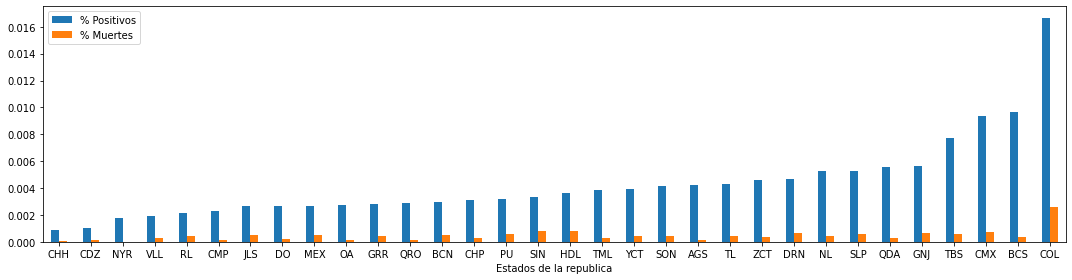

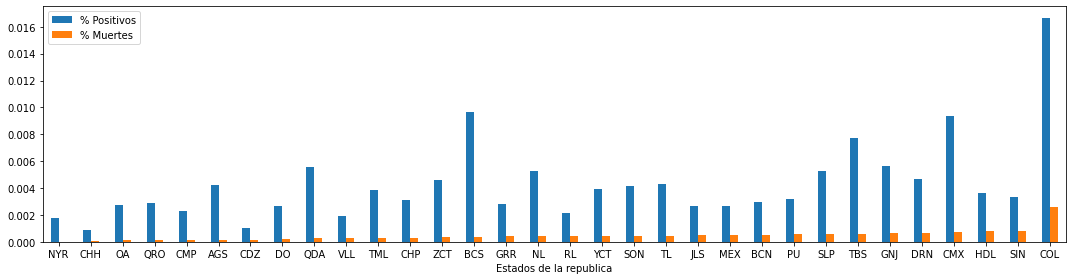

In [64]:
# Casos y Mortalidad por estado
import matplotlib.pyplot as plt
import geopandas

mx = geopandas.read_file('data/mexican_states.geojson')
mx = mx.set_index('fips_admin')
mx = mx.sort_values(by=['fips_admin'])

cases_cv19 = []
deaths_cv19 = []

def who_died(df):
    return df[df['FECHA_DEF'] != '9999-99-99']

cv19_confirmed_cases  = covid_pd[covid_pd['RESULTADO_LAB'] == YES]

covid_by_states_dfs = cv19_confirmed_cases.groupby('ENTIDAD_RES')
for index in range(1, 33):
    df = covid_by_states_dfs.get_group(index)
    cases_cv19.append(df.shape[0])
    deaths_cv19.append(who_died(df).shape[0])

normalized_mx = mx.copy()
mx['positive_cov_19'] = cases_cv19
mx['deaths_cov_19'] = deaths_cv19
mx['population'] = 0

mx.to_csv(join(output_folder, 'table2.csv'), columns=['admin_name', 'positive_cov_19', 'deaths_cov_19'])
mx_status = mx[['admin_name', 'positive_cov_19', 'deaths_cov_19', 'gmi_admin']]


updated_column = map(lambda x: x.strip('MEX-'), list(mx_status['gmi_admin']))
mx_status['Estados de la republica'] = list(updated_column)
mx_status = mx_status.set_index('Estados de la republica')
mx_status.loc['AGS', 'population'] = 1_425_607
mx_status.loc['BCN', 'population'] = 3_769_020
mx_status.loc['BCS', 'population'] = 798_447
mx_status.loc['CMP', 'population'] = 928_363
mx_status.loc['CHP', 'population'] = 5_543_828
mx_status.loc['CHH', 'population'] = 3_741_869
mx_status.loc['CDZ', 'population'] = 3_146_771
mx_status.loc['COL', 'population'] = 731_391
mx_status.loc['DTD', 'population'] = 9_209_944
mx_status.loc['DRN', 'population'] = 1_832_650
mx_status.loc['GNJ', 'population'] = 6_166_934
mx_status.loc['GRR', 'population'] = 3_540_685
mx_status.loc['HDL', 'population'] = 3_082_841
mx_status.loc['JLS', 'population'] = 8_348_151
mx_status.loc['', 'population'] = 16_992_418
mx_status.loc['DO', 'population'] = 4_748_846
mx_status.loc['RL', 'population'] = 1_971_520
mx_status.loc['NYR', 'population'] = 1_235_456
mx_status.loc['NL', 'population'] = 5_784_442
mx_status.loc['OA', 'population'] = 4_132_148
mx_status.loc['PU', 'population'] = 6_583_278
mx_status.loc['QDA', 'population'] = 2_368_467
mx_status.loc['QRO', 'population'] = 1_857_985
mx_status.loc['SLP', 'population'] = 2_822_255
mx_status.loc['SIN', 'population'] = 3_026_943
mx_status.loc['SON', 'population'] = 2_944_840
mx_status.loc['TBS', 'population'] = 2_402_598
mx_status.loc['TML', 'population'] = 3_527_735
mx_status.loc['TL', 'population'] = 1_342_977
mx_status.loc['VLL', 'population'] = 8_062_579
mx_status.loc['YCT', 'population'] = 2_320_898
mx_status.loc['ZCT', 'population'] = 1_622_138

mx_status = mx_status.rename(index={'': 'MEX', 'DTD': 'CMX'})
mx_status.loc['MEX', 'admin_name'] = 'Estado de Mexico'
mx_status.loc['CMX', 'admin_name'] = 'Ciudad de Mexico'

normalized_data = mx_status.copy()
normalized_data['% Positivos'] = mx_status.apply(lambda x: x['positive_cov_19'] * 100 / x['population'], axis=1)
normalized_data['% Muertes'] = mx_status.apply(lambda x: x['deaths_cov_19'] * 100 / x['population'], axis=1)


normalized_mx['positive_cov_19'] = list(normalized_data['% Positivos'])
normalized_mx['deaths_cov_19'] = list(normalized_data['% Muertes'])

ax = normalized_data.drop(['population', 'positive_cov_19', 'deaths_cov_19'], axis=1).sort_values(by=['% Positivos']).plot.bar(rot=0, figsize=(15,4))
plt.tight_layout()

plt.savefig(join(output_folder, 'figure1.png'))
ax = normalized_data.drop(['population', 'positive_cov_19', 'deaths_cov_19'], axis=1).sort_values(by=['% Muertes']).plot.bar(rot=0, figsize=(15,4))

plt.tight_layout()

plt.savefig(join(output_folder, 'figure2.png'))


normalized_data.to_csv(join(output_folder, 'table2.csv'), float_format='{:,.2f}'.format)

# Orden por Acceso a servicios de salud OCDE
# Orden por Grado de pobreza OCDE
# normalized_data



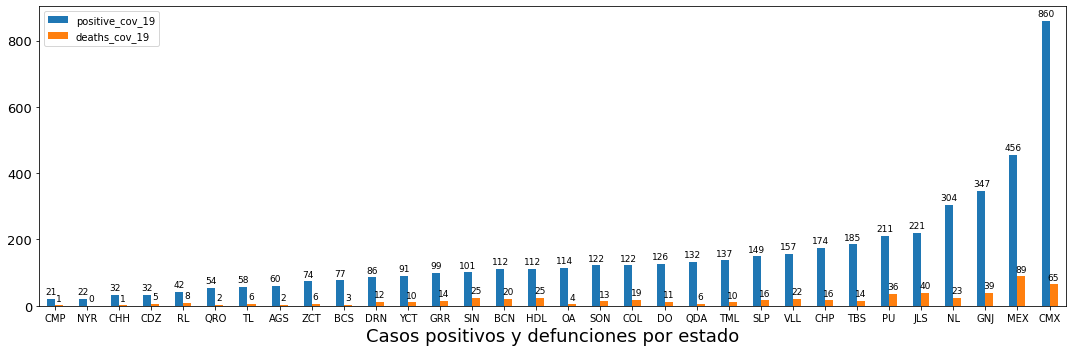

In [66]:
ax = mx_status.drop(['population'], axis=1).sort_values(by=['positive_cov_19']).plot.bar(rot=0, figsize=(15,5))

plt.yticks(fontsize = 13)
plt.xlabel('Casos positivos y defunciones por estado', fontsize = 18)



# add value label to each bar, displayng its height
for p in ax.patches:
    ax.annotate(p.get_height(),
                         (p.get_x() + p.get_width()/2., p.get_height()),
                        ha = 'center', va = 'center', xytext = (0,7), textcoords = 'offset points', size=9)

    plt.tight_layout()

# save Figure 3 as an image
plt.savefig(join(output_folder, 'figure3.png'))

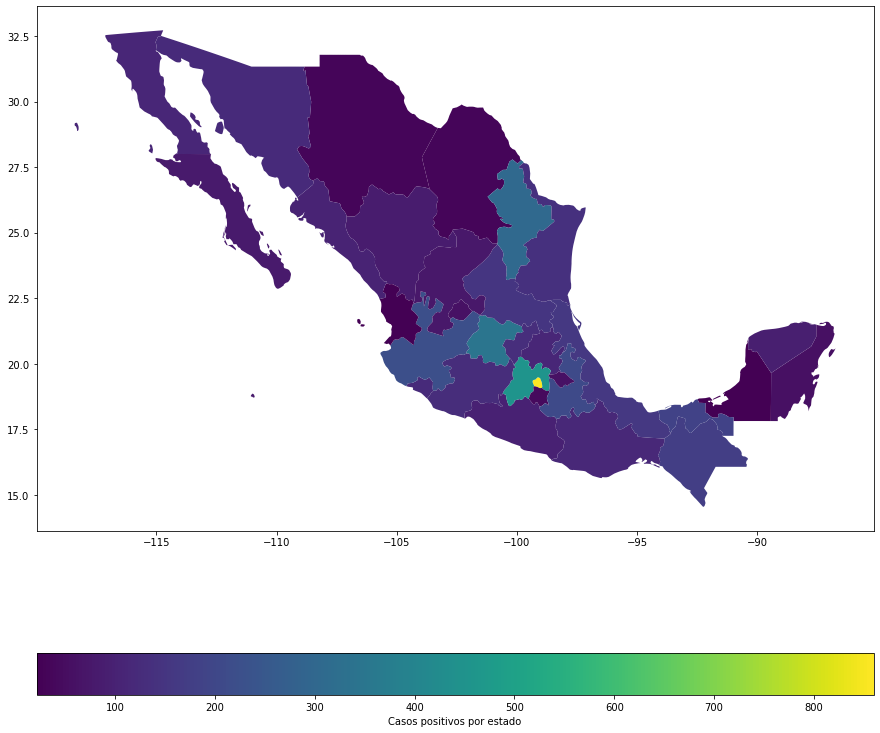

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

mx.plot(column='positive_cov_19', ax=ax, legend=True,
               legend_kwds={'label': "Casos positivos por estado",
                            'orientation': "horizontal"})

plt.savefig(join(output_folder, 'figure4.png'))

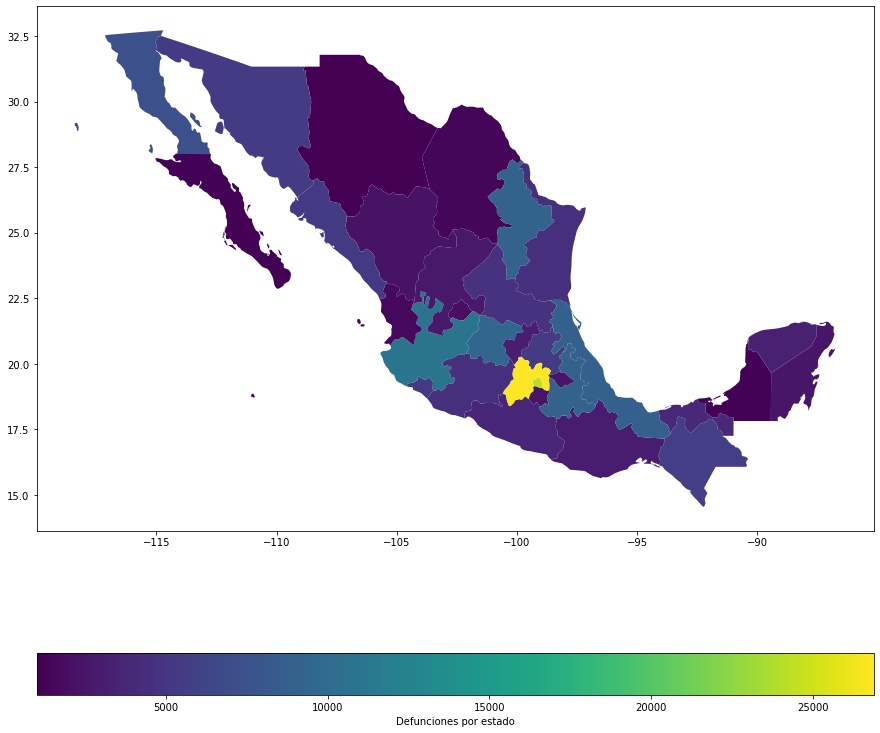

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

mx.plot(column='deaths_cov_19', ax=ax, legend=True,
               legend_kwds={'label': "Defunciones por estado",
                            'orientation': "horizontal"})

plt.savefig(join(output_folder, 'figure5.png'))


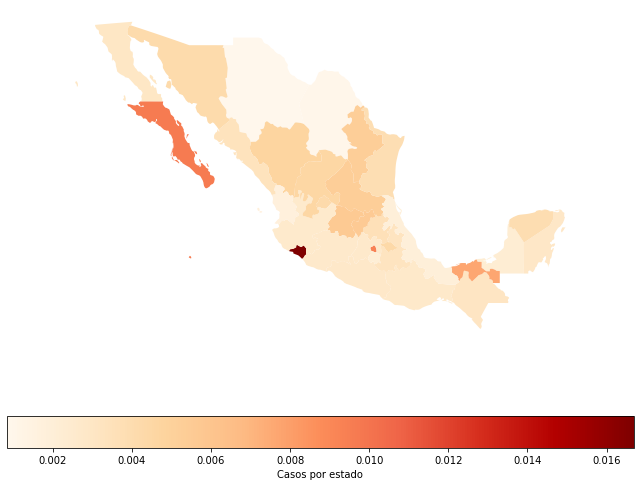

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))

ax.set_yticklabels([])
ax.set_xticklabels([])

ax.axis("off")

normalized_mx.plot(column='positive_cov_19', ax=ax, legend=True,
               legend_kwds={'label': "Casos por estado",
                            'orientation': "horizontal"}, cmap='OrRd')

plt.tight_layout()
plt.savefig(join(output_folder, 'figure6.png'), bbox_inches='tight')


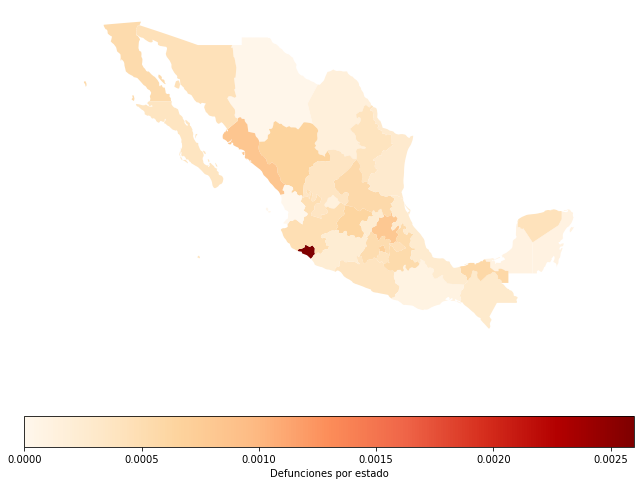

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))

ax.set_yticklabels([])
ax.set_xticklabels([])

ax.axis("off")

normalized_mx.plot(column='deaths_cov_19', ax=ax, legend=True,
               legend_kwds={'label': "Defunciones por estado",
                            'orientation': "horizontal"}, cmap='OrRd')

plt.tight_layout()
plt.savefig(join(output_folder, 'figure7.png'), bbox_inches='tight')

In [10]:
# Impacto de covid en el embarazo

# Hospitalizacion publica vs privada

Diferencia en recuperacion y mortalidad
Tipo de padecimientos por tipo de hospitalizacion
Acceso a servicios de salud

0.0

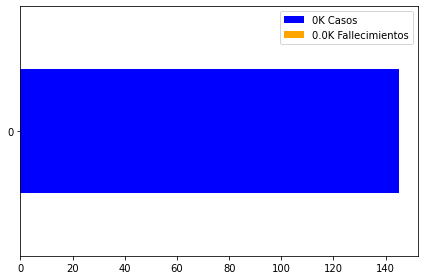

In [36]:
def who_died(df):
    return df[df['FECHA_DEF'] != '9999-99-99']

pregnants = covid_pd[covid_pd['EMBARAZO'] == 1]

deaths_pregants = who_died(pregnants)

cases_no = pregnants.shape[0] - deaths_pregants.shape[0]
deaths_no = deaths_pregants.shape[0]

# Create a sample dataframe with an text index
plotdata = pd.DataFrame({
    "Casos": [cases_no],
    "Fallecimientos": [deaths_no],
})

# Plot a bar chart
plotdata.plot(kind="barh", stacked=True, color=['blue', 'orange'])
plt.legend([f'{cases_no // 1000}K Casos', f'{deaths_no / 1000}K Fallecimientos'])

plt.tight_layout()

plt.savefig(join(output_folder, 'figure8.png'), bbox_inches='tight')

deaths_no * 100 / cases_no

/home/ma/code/crosscompute/covid-19/.new/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6746: RuntimeWarning: invalid value encountered in true_divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


count    0.0
mean     NaN
std      NaN
min      NaN
15%      NaN
50%      NaN
85%      NaN
max      NaN
Name: EDAD, dtype: float64

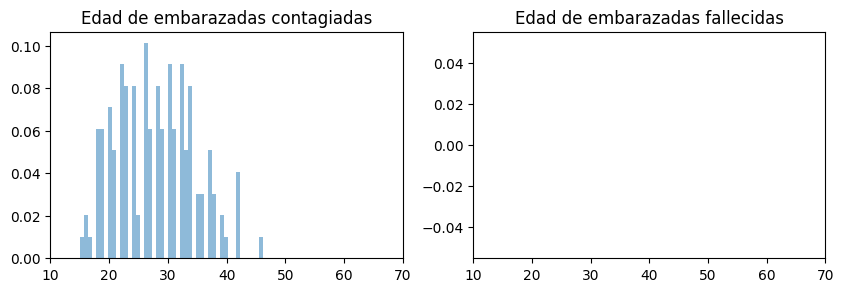

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), dpi=100)

axes[0].hist(pregnants['EDAD'], alpha=0.5, bins=100, density=True, color='tab:blue')
axes[0].set_title('Edad de embarazadas contagiadas')
axes[0].set_xlim(10, 70);

axes[1].hist(deaths_pregants['EDAD'], alpha=0.5, bins=100, density=True, stacked=True, label='Edad de embarazadas fallecidas', color='tab:pink')
axes[1].set_title('Edad de embarazadas fallecidas')
axes[1].set_xlim(10, 70);


plt.savefig(join(output_folder, 'figure9.png'), bbox_inches='tight')
# Afectacion de poblacion indigena
# Vacunacion

deaths_pregants['EDAD'].describe(percentiles=[.15, .85])

In [13]:
# Impacto Acceso a servicios de salud 